# Time Series com Python




## Médias Móveis (Average Moving Smoothing)

é muito simples, mas pode ser usada como baseline



*   Valor médio de valores em uma sequência de tempo.
*   Técnica de suavização que remove variações finas nos dados.
*   Objetivo é remover ruídos e fazer previsões.
*   Pode ser usado para Feature Engineering.



In [1]:
# importa as bibliotecas que serão usadas
import pandas as pd
from pandas import read_csv
from pandas import concat
from matplotlib import pyplot
from numpy import mean
from sklearn.metrics import mean_squared_error

In [6]:
# ler a base de dados usada.
series = read_csv('champagne_sales.csv', header=0, index_col=0, parse_dates=True).squeeze(1)

*   **header=0** : A informação de colunas está na primeira linha do arquivo
*   **parse_date=True** : Sinalizamos que o dataset contém coluna do tipo date.
*   **index_col=0** : Definimos nossa coluna indice que é a informação temporal.
*   **squeeze=True**: Sinalizamos que nos temos apenas um dado de coluna e que queremos transformar isso em uma série e não em um dataframe.

In [7]:
# cria um objeto rolling de janela igual a 3
rolling = series.rolling(window=3)

In [8]:
rolling

Rolling [window=3,center=False,axis=0,method=single]

In [9]:
# calcula a média da janela
rolling_mean = rolling.mean()

In [10]:
# imprime o objeto rolling_mean
print(rolling_mean.head(10))

Month
1964-01-01            NaN
1964-02-01            NaN
1964-03-01    2747.333333
1964-04-01    2716.000000
1964-05-01    2807.333333
1964-06-01    2901.000000
1964-07-01    2754.666667
1964-08-01    2510.000000
1964-09-01    2472.000000
1964-10-01    3145.000000
Name: Sales, dtype: float64


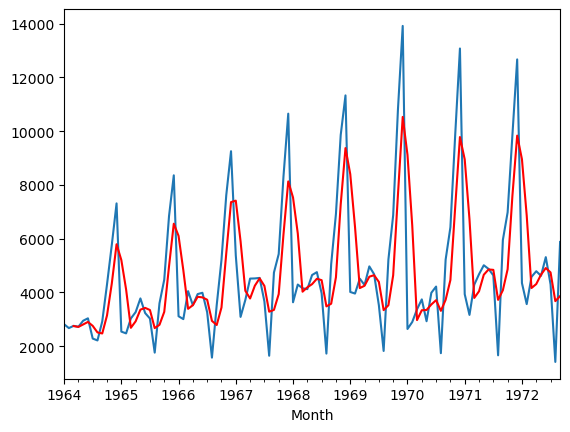

In [13]:
# plot os dados originais e os dados da média móvel 
series.plot()
rolling_mean.plot(color='red')
pyplot.show()

#### Média Móvel - Engenharia de Features



In [14]:
from pandas import DataFrame

In [15]:
# cria um dataframe df
df = DataFrame(series.values)

In [16]:
# imprime as 5 linhas do dataframe
df.head()

,0
0,2815
1,2672
2,2755
3,2721
4,2946


In [17]:
# cria uma constante
tamanho = 3

In [18]:
# cria uma variável com os dados deslocados +1
lag1 = df.shift(1)

In [19]:
# cria uma variável com os dados deslocados +3
lag3 = df.shift(tamanho)

In [20]:
# cria uma janela usando o rolling
window = lag3.rolling(window=tamanho)

In [21]:
# imprime a janela
window

Rolling [window=3,center=False,axis=0,method=single]

In [22]:
# cria a variável media que é a média da jenela.
media = window.mean()

In [23]:
# imprime a variável media
media

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
100,6860.666667
101,4163.000000
102,4309.666667
103,4661.000000


In [24]:
# imprime o dataframe
df.head()

,0
0,2815
1,2672
2,2755
3,2721
4,2946


In [25]:
# concatena os dados
dataframe = concat([media, lag1, df], axis=1)

In [26]:
# cria as colunas
dataframe.columns = ['media', 't', 't+1']

In [27]:
lag3

,0
0,NaN
1,NaN
2,NaN
3,2815.0
4,2672.0
...,...
100,3564.0
101,4577.0
102,4788.0
103,4618.0


In [28]:
# imprime o dataframe
dataframe.head(10)

,media,t,t+1
0,NaN,NaN,2815
1,NaN,2815.0,2672
2,NaN,2672.0,2755
3,NaN,2755.0,2721
4,NaN,2721.0,2946
5,2747.333333,2946.0,3036
6,2716.000000,3036.0,2282
7,2807.333333,2282.0,2212
8,2901.000000,2212.0,2922
9,2754.666667,2922.0,4301


#### Previsões com Média Móvel



1.   Solução simples (walk-forward)
2.   Interessante para se criar baselines.
3.   Pode se usar Janelas Deslizantes para trabalhar com dados quentes.



In [30]:
series

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
              ... 
1972-05-01    4618
1972-06-01    5312
1972-07-01    4298
1972-08-01    1413
1972-09-01    5877
Name: Sales, Length: 105, dtype: int64

In [31]:
# Define uma janela de 3 elementos
window = 3

In [32]:
# Obtem os 3 primeiros valores da serie
history = [series.values[i] for i in range(window)]

In [33]:
# imprime a variável history
history

[2815, 2672, 2755]

In [34]:
# Obtem todos os valores após os tres primeiros.
# range(3, tamanho_da_serie)

test = [series.values[i] for i in range(window, len(series.values))]

In [35]:
# imprime a variável test
# 10 primeiros valores da série após o history
test

[2721,
 2946,
 3036,
 2282,
 2212,
 2922,
 4301,
 5764,
 7312,
 2541,
 2475,
 3031,
 3266,
 3776,
 3230,
 3028,
 1759,
 3595,
 4474,
 6838,
 8357,
 3113,
 3006,
 4047,
 3523,
 3937,
 3986,
 3260,
 1573,
 3528,
 5211,
 7614,
 9254,
 5375,
 3088,
 3718,
 4514,
 4520,
 4539,
 3663,
 1643,
 4739,
 5428,
 8314,
 10651,
 3633,
 4292,
 4154,
 4121,
 4647,
 4753,
 3965,
 1723,
 5048,
 6922,
 9858,
 11331,
 4016,
 3957,
 4510,
 4276,
 4968,
 4677,
 3523,
 1821,
 5222,
 6872,
 10803,
 13916,
 2639,
 2899,
 3370,
 3740,
 2927,
 3986,
 4217,
 1738,
 5221,
 6424,
 9842,
 13076,
 3934,
 3162,
 4286,
 4676,
 5010,
 4874,
 4633,
 1659,
 5951,
 6981,
 9851,
 12670,
 4348,
 3564,
 4577,
 4788,
 4618,
 5312,
 4298,
 1413,
 5877]

In [36]:
# serie original
series.values

array([ 2815,  2672,  2755,  2721,  2946,  3036,  2282,  2212,  2922,
        4301,  5764,  7312,  2541,  2475,  3031,  3266,  3776,  3230,
        3028,  1759,  3595,  4474,  6838,  8357,  3113,  3006,  4047,
        3523,  3937,  3986,  3260,  1573,  3528,  5211,  7614,  9254,
        5375,  3088,  3718,  4514,  4520,  4539,  3663,  1643,  4739,
        5428,  8314, 10651,  3633,  4292,  4154,  4121,  4647,  4753,
        3965,  1723,  5048,  6922,  9858, 11331,  4016,  3957,  4510,
        4276,  4968,  4677,  3523,  1821,  5222,  6872, 10803, 13916,
        2639,  2899,  3370,  3740,  2927,  3986,  4217,  1738,  5221,
        6424,  9842, 13076,  3934,  3162,  4286,  4676,  5010,  4874,
        4633,  1659,  5951,  6981,  9851, 12670,  4348,  3564,  4577,
        4788,  4618,  5312,  4298,  1413,  5877], dtype=int64)

**Previsão com Média Móvel - Janela deslizante**

In [40]:
# Define uma variavel chamada X que é a copia da serie de dados
X = series.values

# Define a variável window = 3 que será a janela de 3 valroes
window = 3

# Obtem os 3 primeiros valores da serie
history = [X[i] for i in range(window)]

# Obtem todos os valores após os tres primeiros.
test = [X[i] for i in range(window, len(X))]

# cria lista de predições
predicoes = []

# Intera sobre os dados de teste...

for t in range(len(test)):
    # define a variavel length com o tamanho da variável history
    length = len(history)
  
    # define a variável valor_predito com a média dos 3 valores correntes..                                                           
    valor_predito = mean([history[i] for i in range(length - window, length)])        

    # define a variável valor_real com o valor atual do teste..
    valor_real = test[t]                                                              

    # alimenta a lista de predicoes
    predicoes.append(valor_predito)                                                  

    # atualiza a lista history com os valores correntes..
    history.append(valor_real)                                                        

    # imprime o valor predito e o real...
    print('Valor predito=%f, Valor real=%f' % (valor_predito, valor_real))                 

Valor predito=2747.333333, Valor real=2721.000000
Valor predito=2716.000000, Valor real=2946.000000
Valor predito=2807.333333, Valor real=3036.000000
Valor predito=2901.000000, Valor real=2282.000000
Valor predito=2754.666667, Valor real=2212.000000
Valor predito=2510.000000, Valor real=2922.000000
Valor predito=2472.000000, Valor real=4301.000000
Valor predito=3145.000000, Valor real=5764.000000
Valor predito=4329.000000, Valor real=7312.000000
Valor predito=5792.333333, Valor real=2541.000000
Valor predito=5205.666667, Valor real=2475.000000
Valor predito=4109.333333, Valor real=3031.000000
Valor predito=2682.333333, Valor real=3266.000000
Valor predito=2924.000000, Valor real=3776.000000
Valor predito=3357.666667, Valor real=3230.000000
Valor predito=3424.000000, Valor real=3028.000000
Valor predito=3344.666667, Valor real=1759.000000
Valor predito=2672.333333, Valor real=3595.000000
Valor predito=2794.000000, Valor real=4474.000000
Valor predito=3276.000000, Valor real=6838.000000


In [41]:
# calcula a métrica de rmse
rmse = sqrt(mean_squared_error(test, predicoes))                               

In [42]:
# imprime o valor de rmse
print('Métrica RMSE: %.3f' % rmse)

Métrica RMSE: 2960.299


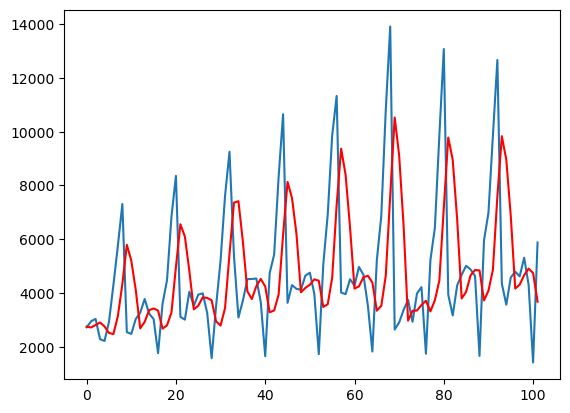

In [43]:
# plot o valor real (test) e as predições 
pyplot.plot(test) 
pyplot.plot(predicoes, color='red')
pyplot.show()

Esse é o modelo simple 